### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


<h1 style="color: crimson ; text-align: center;font-size: 40px;background-color:MistyRose ; padding: 30px;">Credit Card Fraud Detection </h1>

## About Dataset

- Credit card companies should be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
- Through Machine Learning we'll try to recognize and differentiate between normal transaction(done by credit card holder) and fraudulent transaction(done by frauds).
- **Dataset Description :**
    - The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 2,84,315 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions
    - It contains only numerical input variables which are the result of a PCA transformation. 
    - Due to confidentiality issues, the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
        - Feature **'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 
        - The feature **'Amount'** is the transaction Amount. 
        - Feature **'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
df=pd.read_csv('creditcard.csv')

In [3]:
#Sample of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Stats of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Creating a new feature Time Difference
#It'll show the time taken for each transaction
df['Time_diff'] = df['Time'].diff().fillna(df['Time'].iloc[0])

In [7]:
##Target Class Distribution
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

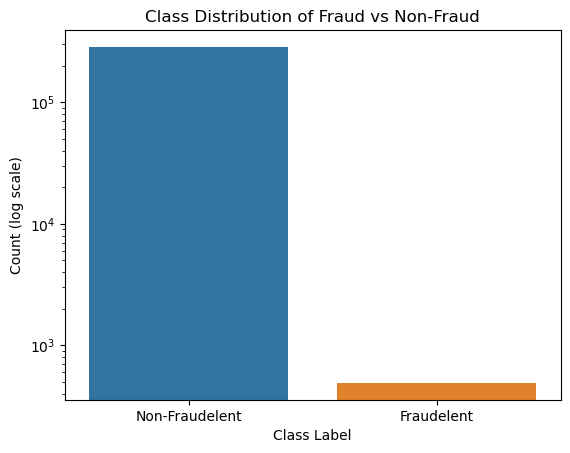

In [8]:
#Visualizing the target class
sns.countplot(data=df,x='Class')
plt.yscale('log')  # Setting y-axis to logarithmic scale for better visualization
plt.xlabel('Class Label')
plt.ylabel('Count (log scale)')
plt.title('Class Distribution of Fraud vs Non-Fraud')

custom_labels = ['Non-Fraudelent', 'Fraudelent']

# Setting x-axis tick labels using custom labels
plt.xticks(range(len(custom_labels)), custom_labels)

plt.show()


In [9]:
# dividing data into fraudulent and non fraudulent transactions
fraud_transaction=df[(df['Class']==1)]
genuine_transaction=df[(df['Class']==0)]

In [10]:
#stats of both types of transactions with respect to amount and time spent
print(fraud_transaction[['Amount','Time_diff']].describe())
print(genuine_transaction[['Amount','Time_diff']].describe())

            Amount   Time_diff
count   492.000000  492.000000
mean    122.211321    1.087398
std     256.683288    1.870144
min       0.000000    0.000000
25%       1.000000    0.000000
50%       9.250000    0.000000
75%     105.890000    1.000000
max    2125.870000   16.000000
              Amount      Time_diff
count  284315.000000  284315.000000
mean       88.291022       0.605867
std       250.105092       1.051232
min         0.000000       0.000000
25%         5.650000       0.000000
50%        22.000000       0.000000
75%        77.050000       1.000000
max     25691.160000      32.000000


- Fraudulent Amounts are not very big ,most probably to avoid attention, max fraud is of 2125 ,but mostly around 10.
- Although the time elapsed is different for both types of transaction , but since the dataset is imbalanced we can't rely on that.

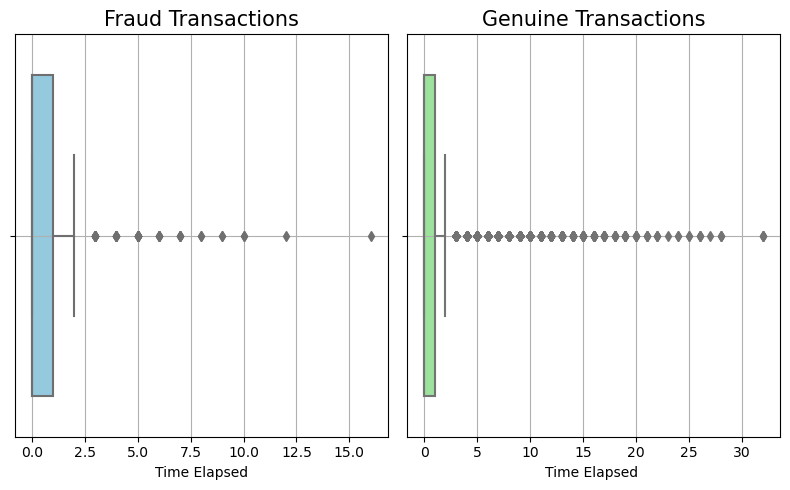

In [11]:
#Plotting a boxplot to see the time elapsed for both kind of transactions
fig,axes=plt.subplots(1,2,figsize=(8,5))
sns.boxplot(data=fraud_transaction, x='Time_diff', ax=axes[0], color='skyblue')
axes[0].set_title('Fraud Transactions',fontsize=15)
axes[0].set_xlabel('Time Elapsed')

axes[0].grid(True)

sns.boxplot(data=genuine_transaction, x='Time_diff', ax=axes[1], color='lightgreen')
axes[1].set_title('Genuine Transactions',fontsize=15)
axes[1].set_xlabel('Time Elapsed ')

axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



In [12]:
#Log transforming amount for better visualization
log_amount = np.log1p(genuine_transaction['Amount'])

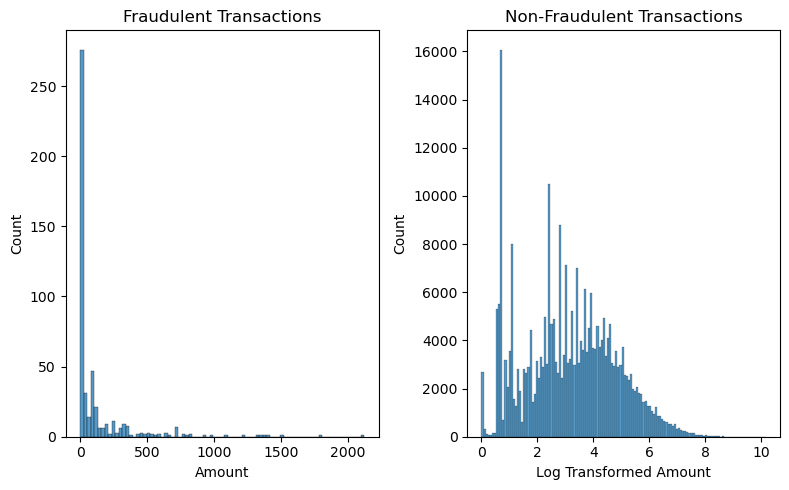

In [13]:
#plotting a distibution for both kind of transaction amount
fig,axes=plt.subplots(1,2,figsize=(8,5))

sns.histplot(ax=axes[0],data=fraud_transaction,x='Amount')
axes[0].set_title('Fraudulent Transactions')

sns.histplot(ax=axes[1],data=log_amount)
axes[1].set_title('Non-Fraudulent Transactions')
axes[1].set_xlabel('Log Transformed Amount')


plt.tight_layout()
plt.show()

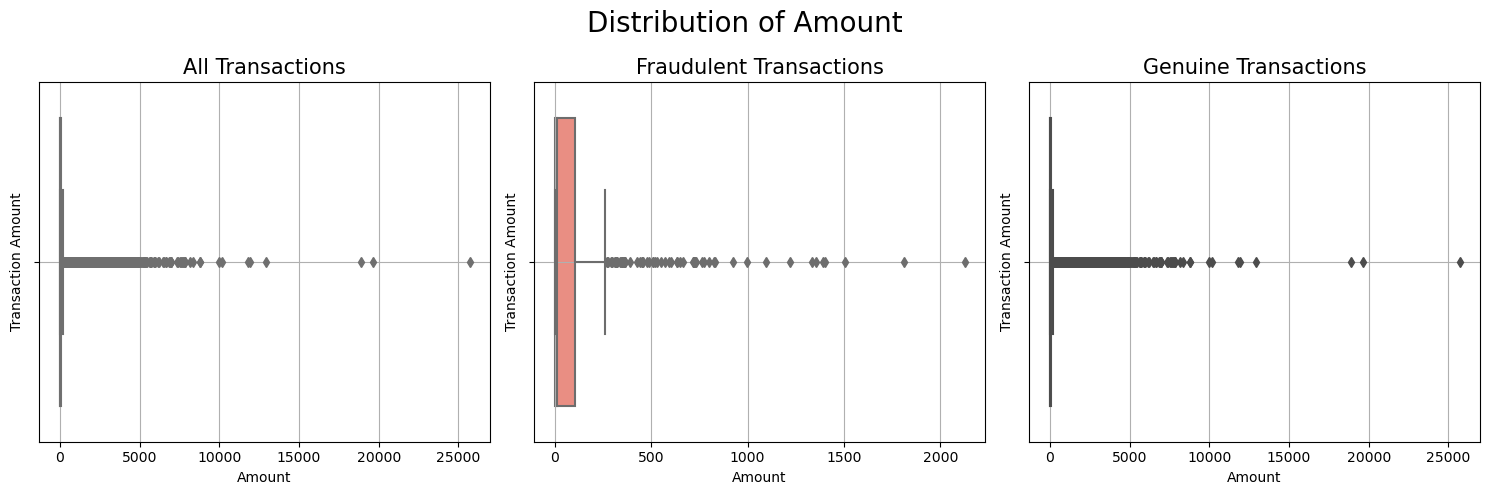

In [14]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Amount',fontsize=20)

# Customize boxplot for the entire dataset
sns.boxplot(data=df, x='Amount', ax=axes[0], color='skyblue')
axes[0].set_title('All Transactions',fontsize=15)
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Transaction Amount')
axes[0].grid(True)

# Customize boxplot for fraudulent transactions
sns.boxplot(data=fraud_transaction, x='Amount', ax=axes[1], color='salmon')
axes[1].set_title('Fraudulent Transactions',fontsize=15)
axes[1].set_xlabel('Amount',)
axes[1].set_ylabel('Transaction Amount')
axes[1].grid(True)

# Customize boxplot for genuine transactions
sns.boxplot(data=genuine_transaction, x='Amount', ax=axes[2], color='limegreen')
axes[2].set_title('Genuine Transactions',fontsize=15)
axes[2].set_xlabel('Amount')
axes[2].set_ylabel('Transaction Amount')
axes[2].grid(True)


plt.tight_layout()
plt.show()


**Observations :**
- The dataset is higly imbalance with respect to the target class.
- During Fraud Detection this is a general scenario,as most of the tranasactions are genuine.
- The range of the transaction amount is very high. 

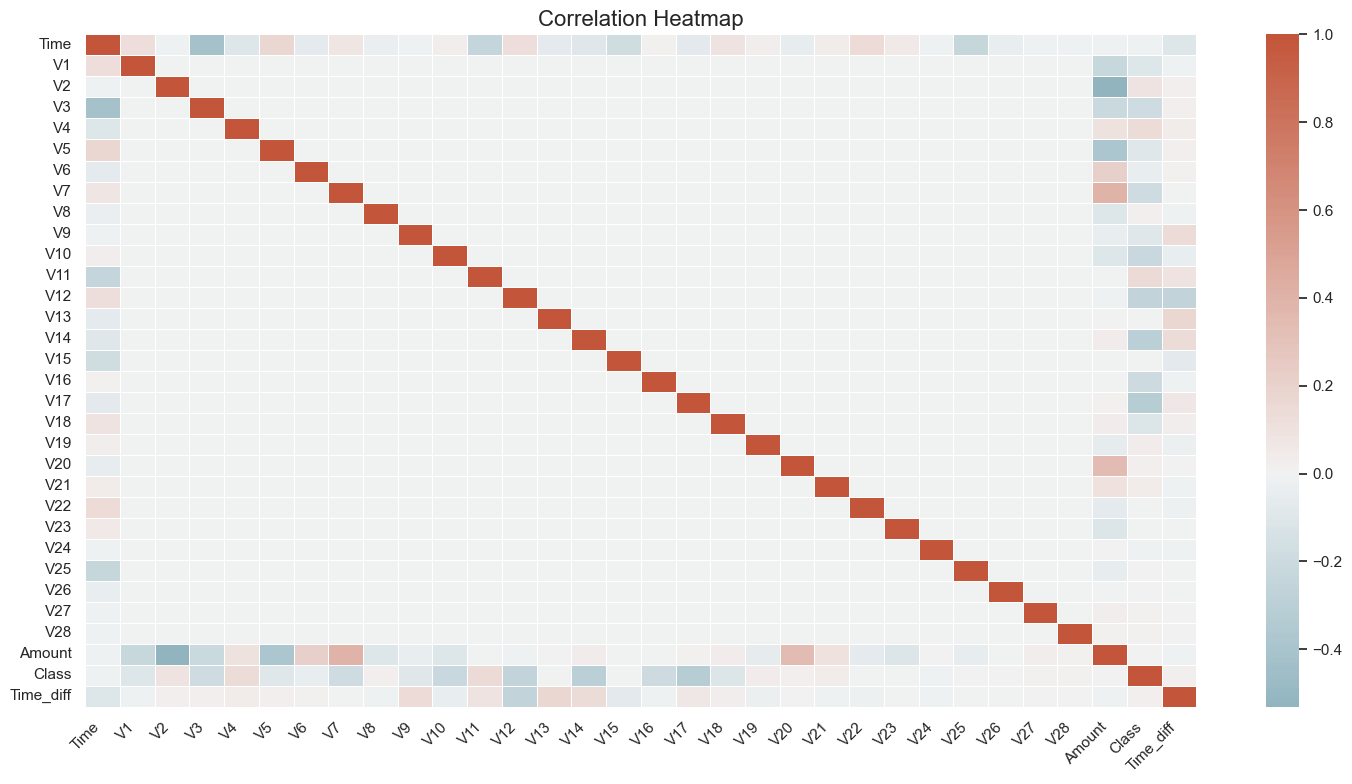

In [15]:
sns.set(style="white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(15, 8))

# Creating the heatmap with customized parameters
sns.heatmap(df.corr(), cmap=cmap, center=0, linewidths=.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


- Before balancing the dataset, let's apply logistic regression to undertsand the impact of imbalanced dataset.
- This will help us to set a baseline for the improvement of our model.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix :


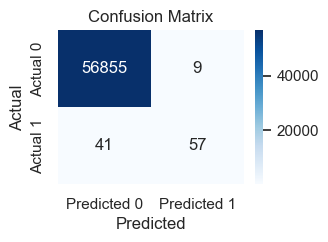

In [16]:
# Separate features and target variable
X = df.drop(['Class','Time','Time_diff'], axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Logistic classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the classifier
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))


#Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- Considering the class imbalance (98 fraudulent transactions out of 56,962 total), **we can't rely on Accuracy** it's important to focus on class-specific metrics (precision, recall, and F1-score) for a comprehensive evaluation.

- For class 0 (non-fraudulent transactions):
    - The model performs perfectly with precision, recall, and F1-score all equal to 1.00, indicating that the model correctly identified all non-fraudulent transactions.
    - This is happening due to presence of majority of non-fraud transactions.

- For class 1 (fraudulent transactions):
    - The model's performance is moderate,and we need to improve this as it is important to capture frauds.
    - The precision of 0.86 indicates that 86% of the transactions predicted as fraudulent were indeed fraudulent. 
        - Out of 66 Prediction as fraud , 57 were actually fraud and 9 were wrongly predicted as they were non-fraud,scope of improvement but not a very big issue.
    - The recall of 0.58 means the model captured 58% of all actual fraudulent transactions. 
        - Now this is dangerous ,model predicted 41 Fraud Transactions ,almost 41% as Non-Fraud,so we need to improve the performance.
    
- The F1-score of 0.70 balances precision and recall.



- **class_weight='balanced'** class_weight='balanced' in classifiers like logistic regression or support vector machines, the algorithm automatically adjusts the weights of the classes inversely proportional to their frequencies. In other words, it assigns higher weights to the minority class and lower weights to the majority class, ensuring that the model gives more importance to the minority class during the training process.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix :


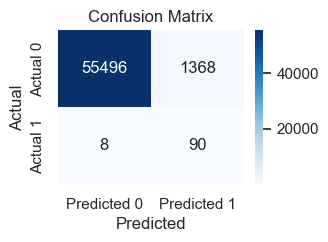

In [17]:
# USing the inbuilt parameter of logistic regression to handle the class imbalance

log_reg_bal = LogisticRegression(max_iter=1000,class_weight='balanced')
log_reg_bal.fit(X_train, y_train)
y_pred = log_reg_bal.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



- Since our focus is on capturing the Fraudulent Transactions ,so let see what happened after using **class_weight='balanced'**.
- After Applying Class Imbalance:
    - The focus on balancing class weights impacted the performance metrics significantly.
    - Precision for class 1 dropped dramatically, indicating that when the model predicts class 1, it is often incorrect.
    - However, recall for class 1 improved, suggesting that the model is now better at capturing actual instances of class 1.
    - Able to capture 90 fraud transaction out of 98.
- Seems like model became too sensitive towards class 1 ,and trying to predict even the Non-Fraud as Fraud.
- So considering the Fraud Transactions , model is good in capturing them, but still we need to find a good balance between them.

In [18]:

X1=df.drop(['Time','Class'],axis=1)
y1=df['Class']

In [19]:
# Balancing hte dataset
# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the entire dataset
X_resampled, y_resampled = smote.fit_resample(X1, y1)

In [20]:
y_resampled.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

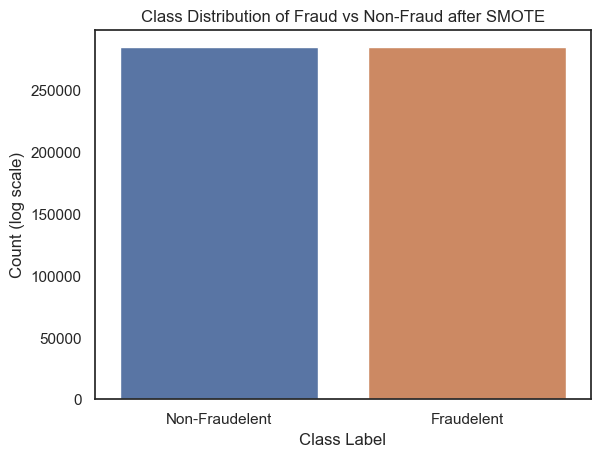

In [21]:
#Distribution of Balanced Class
sns.countplot(x=y_resampled)
plt.xlabel('Class Label')
plt.ylabel('Count (log scale)')
plt.title('Class Distribution of Fraud vs Non-Fraud after SMOTE')

custom_labels = ['Non-Fraudelent', 'Fraudelent']

# Setting x-axis tick labels using custom labels
plt.xticks(range(len(custom_labels)), custom_labels)

plt.show()

In [22]:
#Balanced dataset
data=pd.concat([X_resampled, y_resampled], axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_diff,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,1.000000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-4.401331,1.662285,-6.941884,4.879644,-5.081860,0.009492,-3.386245,1.412588,-3.250366,-7.767724,...,0.486672,1.215460,-0.532200,0.388465,-0.009042,2.280602,0.075180,648.214807,0.010988,1
568626,-3.352917,0.753401,-1.698278,0.863169,-1.186314,-0.406322,-1.652498,0.020940,-0.018209,-2.696694,...,0.454379,-0.130009,-0.499223,-0.042935,0.987288,-1.389017,0.750979,101.500000,0.000000,1
568627,-1.564143,1.428824,-0.924170,1.519906,-0.873001,-0.597239,-1.893836,0.566848,-1.199565,-2.417820,...,0.605191,-0.187337,-0.265952,0.376297,-0.316963,-0.228888,-0.069672,19.577597,0.785348,1
568628,0.735622,-0.207872,-2.800054,1.202564,-0.334384,-1.255962,0.399713,-0.248019,0.603603,-2.156587,...,-0.168074,-0.151374,-0.326656,-0.009685,-0.572405,0.067883,0.009869,358.668889,0.000000,1


In [23]:
f=data[(data['Class']==1)]
nf=data[(data['Class']==0)]

In [24]:
#Stats of Fraud and Genuine Transaction
print('Fraud Transactions :')
print(f[['Amount','Time_diff']].describe())
print('\n Non-Fraud Transactions :')
print(nf[['Amount','Time_diff']].describe())

Fraud Transactions :
              Amount      Time_diff
count  284315.000000  284315.000000
mean      121.025109       0.995000
std       250.490587       1.480363
min         0.000000       0.000000
25%         1.000000       0.000000
50%         8.546254       0.607574
75%       104.781665       1.049134
max      2125.870000      16.000000

 Non-Fraud Transactions :
              Amount      Time_diff
count  284315.000000  284315.000000
mean       88.291022       0.605867
std       250.105092       1.051232
min         0.000000       0.000000
25%         5.650000       0.000000
50%        22.000000       0.000000
75%        77.050000       1.000000
max     25691.160000      32.000000


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

Confusion Matrix :


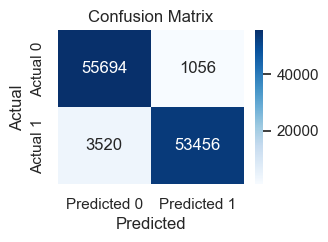

In [25]:
# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
log_reg_bal = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
log_reg_bal.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_bal.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




- Since the data is balanced now let's apply cross-validation ,to see how well it is performing overall.

In [ ]:
# Applying cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits as needed
accuracy_scores = cross_val_score(log_reg_bal, X_resampled, y_resampled, cv=cv, scoring=make_scorer(accuracy_score))

# Print cross-validation scores
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

- The model consistently achieves accuracy scores around 96%, and the mean accuracy is approximately 96%. 
- This suggests that the model generalizes well to different subsets of the data.

## Conclusion :

- Here are the key takeaways from the report:-

- Precision:
 - Class 0 (negative class): 94%
 - Class 1 (positive class): 98%
 - The high precision values indicate that when the model predicts a class, it is highly likely to be correct. For instance, in classifying instances as 0, the model is correct 94% of the time, and for class 1, it is correct 98% of the time.

- Recall:
 - Class 0: 98%
 - Class 1: 94%
 - A recall of 98% for class 0 means that the model successfully captures 98% of all instances belonging to class 0, and similarly, a recall of 94% for class 1 indicates the model's effectiveness in identifying instances of class 1.

- F1-Score:
 - Class 0: 96%
 - Class 1: 96%
 - Both classes exhibit a high F1-score of 96%, indicating a robust balance between precision and recall.

- Accuracy:
 - Overall Accuracy: 96%
 - The model achieves an impressive overall accuracy of 96%, underscoring its proficiency in correctly classifying instances from both classes as the classes are balanced in this model.
 
- Confusion Matrix:

 - In summary, the classification report reflects a highly effective model with strong precision, recall, and F1-score values for both classes. The high overall accuracy and balanced performance metrics suggest that the model is well-suited for the given classification task. 
 
- Cross-Validation :
 - The model consistently achieves accuracy scores around 96%, and the mean accuracy is approximately 96%. 
 - This suggests that the model generalizes well to different subsets of the data.

- However, further analysis, such as investigating potential bias or examining misclassified instances, may provide additional insights for model improvement ,as there are still 3520 fraud transaction misclassified as Non-Fraud ,some of the techniques which we can use :
 - Hyperparameter tuning
 - Using some advanced classification models.
 - Feature Selection





